In [1]:
import pandas as pd 
df = pd.read_csv('housepricedata.csv')
df.head()

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1


In [2]:
x = df.values[: ,0:10]
y = df.values[:, 10]

from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
x_scale = min_max_scaler.fit_transform(x)

In [3]:
x_scale

array([[0.0334198 , 0.66666667, 0.5       , ..., 0.5       , 0.        ,
        0.3864598 ],
       [0.03879502, 0.55555556, 0.875     , ..., 0.33333333, 0.33333333,
        0.32440056],
       [0.04650728, 0.66666667, 0.5       , ..., 0.33333333, 0.33333333,
        0.42877292],
       ...,
       [0.03618687, 0.66666667, 1.        , ..., 0.58333333, 0.66666667,
        0.17771509],
       [0.03934189, 0.44444444, 0.625     , ..., 0.25      , 0.        ,
        0.16925247],
       [0.04037019, 0.44444444, 0.625     , ..., 0.33333333, 0.        ,
        0.19464034]])

In [4]:
from sklearn.model_selection import train_test_split
x_train, x_val_and_test, y_train, y_val_and_test = train_test_split(x_scale, y, test_size=0.3)
x_val, x_test , y_val, y_test = train_test_split(x_val_and_test, y_val_and_test, test_size=0.50)
print('X_train.shape : ', x_train.shape)
print('X_test.shape : ', x_test.shape)
print('X_val.shape : ', x_val.shape)
print('Y_train.sahpe : ', y_train.shape)
print('Y_test.shape : ', y_test.shape)
print('Y_val.shpae : ', y_val.shape)

X_train.shape :  (1022, 10)
X_test.shape :  (219, 10)
X_val.shape :  (219, 10)
Y_train.sahpe :  (1022,)
Y_test.shape :  (219,)
Y_val.shpae :  (219,)


In [5]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential([
    Dense(32, activation='relu', input_shape=(10,)),
    Dense(32, activation='relu'), 
    Dense(1, activation='sigmoid'),
])

C:\Users\ahmed.habib\AppData\Local\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

In [7]:
hist = model.fit(x_train, y_train, batch_size=32, epochs=100, validation_data=(x_val, y_val))

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.4932 - loss: 0.7391 - val_accuracy: 0.5023 - val_loss: 0.7096
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4969 - loss: 0.7059 - val_accuracy: 0.4977 - val_loss: 0.6892
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5107 - loss: 0.6869 - val_accuracy: 0.6621 - val_loss: 0.6761
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6771 - loss: 0.6750 - val_accuracy: 0.7032 - val_loss: 0.6662
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7107 - loss: 0.6665 - val_accuracy: 0.7489 - val_loss: 0.6574
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7451 - loss: 0.6588 - val_accuracy: 0.7397 - val_loss: 0.6494
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7610 - loss: 0.6500 - val_accuracy: 0.7489 - val_loss: 0.6415
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7530 - loss: 0.6452 - val_accuracy: 0.7534 - v

In [8]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(test_loss)
print(test_accuracy)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8398 - loss: 0.3159 
0.2882130444049835
0.853881299495697


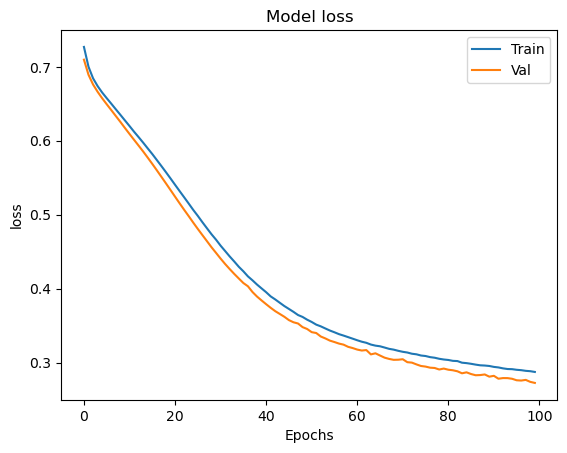

In [9]:
import matplotlib.pyplot as plt 
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss']) 
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

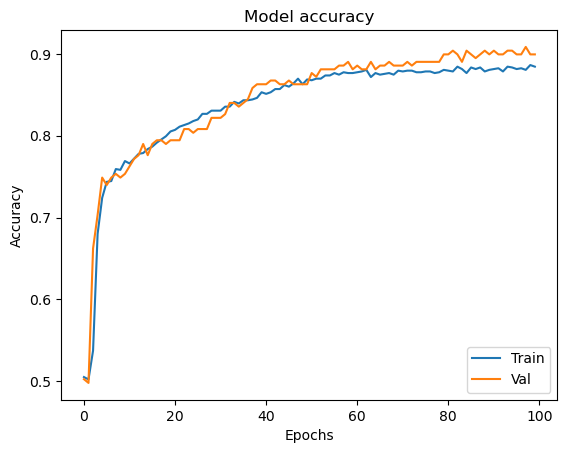

In [10]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])

plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [11]:
model_2 = Sequential([
    Dense(1000, activation='relu', input_shape=(10,)), 
    Dense(1000, activation='relu'), 
    Dense(1000, activation='relu'), 
    Dense(1,activation='sigmoid'),
])

model_2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
hist_2 = model_2.fit(x_train, y_train, batch_size=32, epochs=100, validation_data=(x_val, y_val)) 

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.7090 - loss: 0.5346 - val_accuracy: 0.8493 - val_loss: 0.3503
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.8623 - loss: 0.3467 - val_accuracy: 0.8356 - val_loss: 0.3597
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.8597 - loss: 0.3230 - val_accuracy: 0.8904 - val_loss: 0.3188
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8797 - loss: 0.2965 - val_accuracy: 0.8767 - val_loss: 0.2759
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8844 - loss: 0.2803 - val_accuracy: 0.9041 - val_loss: 0.3015
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9017 - loss: 0.2660 - val_accuracy: 0.9041 - val_loss: 0.3674
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.8797 - loss: 0.2981 - val_accuracy: 0.9041 - val_loss: 0.2725
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.8846 - loss: 0.2771 - val_accuracy: 0.

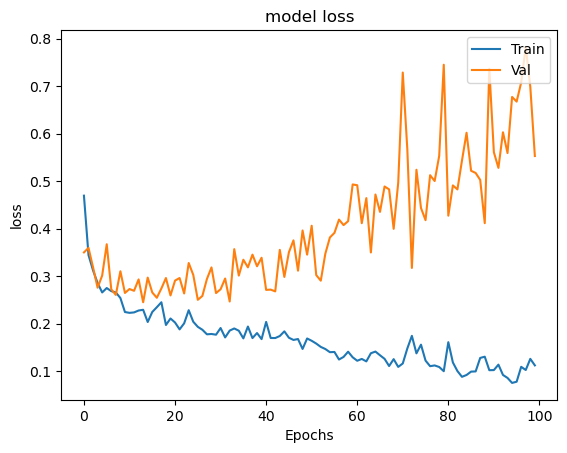

In [12]:
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

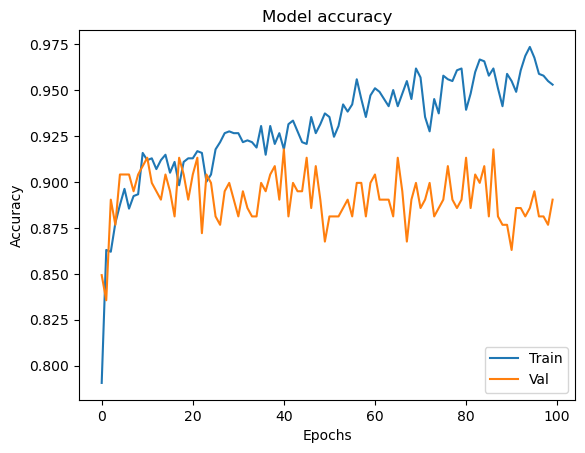

In [13]:
plt.plot(hist_2.history['accuracy'])
plt.plot(hist_2.history['val_accuracy'])

plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [14]:
from keras.layers import Dropout
from keras import regularizers

model_3 = Sequential([
    Dense(1000, activation='relu', kernel_regularizer= regularizers.l2(0.01), input_shape=(10, )),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer= regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer= regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer= regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid', kernel_regularizer = regularizers.l2(0.01)), 
])

model_3.compile(optimizer='adam', loss='binary_crossentropy', 
               metrics=['accuracy'])
hist_3 = model_3.fit(x_train, y_train, batch_size= 32 , epochs=100, validation_data=(x_val,y_val))

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.5597 - loss: 21.1088 - val_accuracy: 0.7991 - val_loss: 3.8768
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.8453 - loss: 2.4644 - val_accuracy: 0.8037 - val_loss: 0.7127
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.8369 - loss: 0.6473 - val_accuracy: 0.8904 - val_loss: 0.5014
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.8517 - loss: 0.5521 - val_accuracy: 0.8858 - val_loss: 0.4660
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.8832 - loss: 0.4923 - val_accuracy: 0.8630 - val_loss: 0.4590
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.8712 - loss: 0.4920 - val_accuracy: 0.9224 - val_loss: 0.4359
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.8771 - loss: 0.4688 - val_accuracy: 0.9224 - val_loss: 0.4401
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.8878 - loss: 0.4675 - val_accuracy: 0

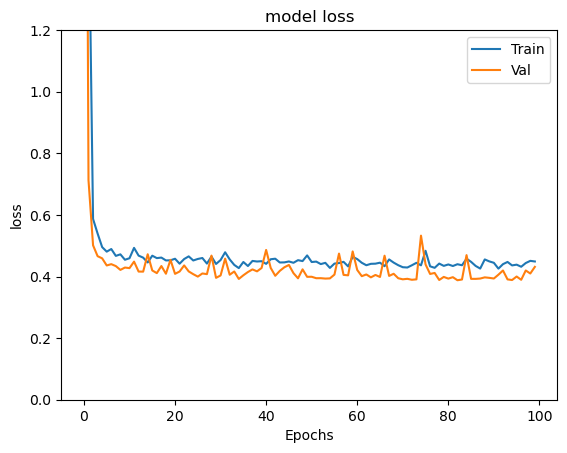

In [15]:
plt.plot(hist_3.history['loss'])
plt.plot(hist_3.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim(top=1.2, bottom=0)
plt.show()

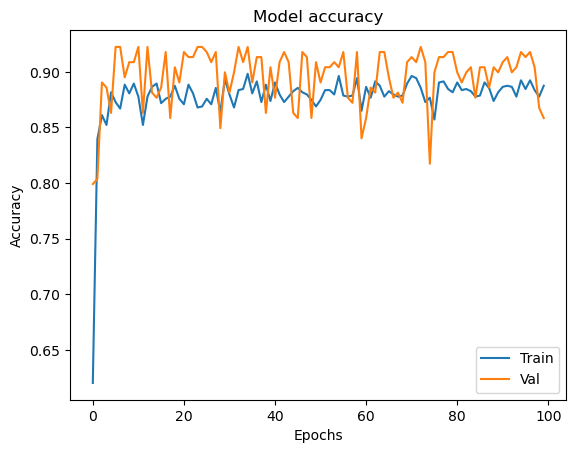

In [16]:
plt.plot(hist_3.history['accuracy'])
plt.plot(hist_3.history['val_accuracy'])

plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [17]:
from sklearn.metrics import recall_score, f1_score, precision_score
y_pred = model.predict(x_test)

y_pred_classes=[]

for prob in y_pred:
    if prob >= 0.5:
        y_pred_classes.append(1)
    else:
        y_pred_classes.append(0)

precision = precision_score(y_test, y_pred_classes)

recall = recall_score(y_test, y_pred_classes)

f1 = f1_score(y_test, y_pred_classes)

print("Precision:", round(precision*100,0))
print("Recall:", round(recall*100,0))
print("F1 Score:", round(f1*100,0))

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Precision: 85.0
Recall: 87.0
F1 Score: 86.0


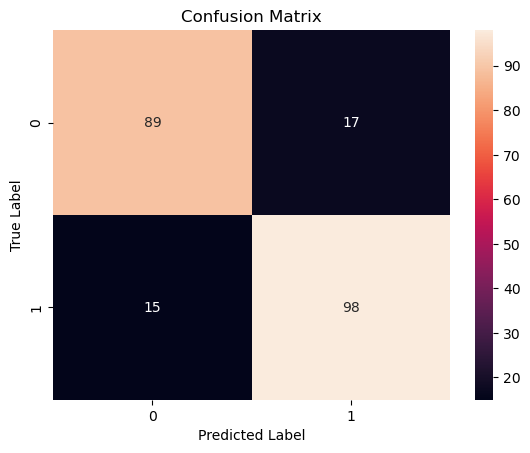

In [18]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

confusion_mat = confusion_matrix(y_test, y_pred_classes)

sns.heatmap(confusion_mat, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [19]:
model.save('houses_model.keras')

In [20]:
from joblib import dump
dump(min_max_scaler, 'hosues_min_max_scaler.pkl')

['hosues_min_max_scaler.pkl']

In [21]:
import numpy as np
new_house = np.array([[100, 6, 6, 800, 2, 2, 3, 7, 1, 500]])

In [22]:
from joblib import load

min_max_scaler_loaded = load('houses_min_max_scaler.pkl')
new_house = min_max_scaler_loaded.transform(new_house)
new_house

C:\Users\ahmed.habib\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator MinMaxScaler from version 1.6.1 when using version 1.5.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


array([[-0.00560892,  0.55555556,  0.625     ,  0.1309329 ,  0.66666667,
         1.        ,  0.375     ,  0.41666667,  0.33333333,  0.35260931]])

In [23]:
from keras.models import load_model

loaded_model = load_model('houses_model.keras')

In [24]:
new_prediction_proba = loaded_model.predict(new_house)
new_prediction = (new_prediction_proba > 0.5)
print(new_prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
[[ True]]
